### Определение перспективного тарифа для телеком компании.

Клиентам федерального оператора сотовой связи «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

1. [Изучение и предобработка данных](#1)
2. [Подготовка данных для анализа.](#2)
3. [Первичный анализ данных.](#3)
4. [Проверка гипотез.](#4)
5. [Общий вывод.](#5)

In [53]:
# < импорт библиотек >
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

# < увеличим дефолтный размер графиков >
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# < увеличим дефолтное количество колонок >
pd.set_option('display.max_columns', 40)

### Шаг 1. Изучение и предобработка данных.
<a id='1'></a>

In [54]:
# < импортируем данные >
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

# < создаём функцию для первичного анализа dataframe >
def eda(df):
    print('\033[1m' + '\nШапка таблицы' + '\033[0m')
    display(df.head())
    print('\033[1m'+'\nИнформаци по колонкам\n' + '\033[0m')
    print(df.info())
    print('\033[1m'+'\nОсновные статистики\n' + '\033[0m')
    print(df.describe())

### Данные по звонкам:

In [55]:
df_calls.pipe(eda)


Шапка таблицы


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Основные статистики

            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


### Замечания:
1. Пропусков нет.
2. Переменную с датами нужно привести к datetime.
3. Тарификация помесячная, поэтому добавим данные о месяце.
4. Длительность звонка нужно сделать целочисленной, округлив в большую сторону. Учитывая, что "неотвеченные" звонки также тарифицируются и округляются вверх, приравняем все 0 к 1.

In [56]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month

df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls['duration'] = df_calls['duration'].where(df_calls['duration'] > 0, 1)

df_calls.pipe(eda)
print()
print('Временной период данных', df_calls['call_date'].min(), '-', df_calls['call_date'].max())


Шапка таблицы


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB
None

Основные статистики

            duration        user_id          month
count  202607.000000  202607.000000  202607.000000
mean        7.353714    1253.940619       8.574067
std         5.733230     144.722751       2.787093
min         1.000000    1000.000000       1.000000
25%         2.000000    1126.000000       7.000000
50%         6.000000    1260.000000       9.000000
75%        11.000000    1379.000000      11.000000
max        38.000000    1499.000000      12.000000

Временной период данных 2018-01-01 00:00:00 - 2018-12-31 00:00:00


### Данные по интернет трафику:

In [57]:
df_internet.pipe(eda)


Шапка таблицы


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None

Основные статистики

             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000


### Замечания:
1. Пропусков нет.
3. Переменную с датами нужно привести к datetime.
4. Тарификация помесячная, поэтому добавим данные о месяце.
5. Объём трафика нужно сделать целочисленным, округлив в большую сторону. Учитывая, что любой выход в интернет тарифицируется и округляется вверх, приравняем все 0 к 1.

In [58]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month

df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype('int')
df_internet['mb_used'] = df_internet['mb_used'].where(df_internet['mb_used'] > 0, 1)

df_internet.pipe(eda)
print('Временной период данных', df_internet['session_date'].min(), '-', df_internet['session_date'].max())


Шапка таблицы


,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.8+ MB
None

Основные статистики

             mb_used        user_id          month
count  149396.000000  149396.000000  149396.000000
mean      370.753280    1252.099842       8.563315
std       278.212524     144.050823       2.788717
min         1.000000    1000.000000       1.000000
25%       139.000000    1130.000000       7.000000
50%       349.000000    1251.000000       9.000000
75%       560.000000    1380.000000      11.000000
max      1725.000000    1499.000000      12.000000
Временной период данных 2018-01-01 00:00:00 - 2018-12-31 00:00:00


### Данные по смс:

In [59]:
df_messages.pipe(eda)


Шапка таблицы


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

Основные статистики

             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


### Замечания:
1. Пропусков нет.
2. Переменную с датами нужно привести к datetime.
3. Тарификация помесячная, поэтому добавим данные о месяце.

In [60]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month

df_messages.info()
print('Временной период данных', df_internet['session_date'].min(), '-', df_internet['session_date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB
Временной период данных 2018-01-01 00:00:00 - 2018-12-31 00:00:00


### Данные по тарифам и клиентам:

In [61]:
df_tariffs.pipe(eda)
print()
print('--------------------------------------------------------------------')
print()
df_users.pipe(eda)


Шапка таблицы


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

Основные статистики

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.00

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Информаци по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Основные статистики

           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


### Замечания:
1. С тарифами всё просто: 2 тарифа для анализа - 2 строчки в таблице без пропусков.
2. В данных по клиентам пропуски есть в переменной churn_date (дата прекращения пользования тарифом). Пропущенные значения говорят о том, что тариф ещё действовал на момент выгрузки данных. Поэтому не будем их заменять.
3. Перемнные с датами приведём к datetime.
4. Добавим данные о месяце регистрации.

In [62]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['reg_month'] = df_users['reg_date'].dt.month

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['churn_month'] = df_users['churn_date'].dt.month

df_users.info()
print('Временной период данных', df_users['reg_month'].min(), '-', df_users['reg_month'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
reg_month      500 non-null int64
churn_month    38 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB
Временной период данных 1 - 12


### Шаг 2. Подготовка данных для анализа.
<a id='2'></a>

Временной период наших данных с 01 января 2018 до 31 декабря 2018 (1 год). Тарификация помесячная, поэтому все данные нужны в разбивке по месяцам. Создадим таблицу, где для каждого user будет каждый месяц.

In [63]:
# < Создаём таблицу, в которой будут все месяца нашего периода данных >
months = pd.DataFrame(pd.date_range(df_users['reg_date'].min() , df_users['reg_date'].max(), freq='MS'))
months.columns = ['month']

# < Добавляем новый столбец к нашим данным по клиентам >
months['key'] = 1
df_users['key'] = 1
df_summary = df_users.merge(months, on='key')
df_summary['month'] = df_summary['month'].dt.month

df_summary

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,key,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1,2
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1,3
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1,4
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,1,8
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,1,9
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,1,10
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,1,11


Получилась таблица, в которой 6000 строк (500 клиентов * 12 месяцев). Оставим данные, которые будут лежать между датой регистрации и датой прекращения пользования тарифом.

In [64]:
# < фильтруем данные >
df_summary = df_summary.query('(reg_month <= month <= churn_month) or (churn_month.isna() == True and reg_month <= month)')

# < удаляем лишние столбцы >
df_summary.drop(columns='key', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


В каркасе нашей таблицы получилось 3216 строк. Каждая строка соответсвует 1 user_id и 1 месяцу пользования тарифом. Теперь необходимо сгруппировать данные по звонкам, интернет трафику и смс, и добавить их к нашей summary-таблице.

In [65]:
# < Группируем данные по звонкам. Для каждого user_id находим суммарное время звонков за месяц и количество звонков >
calls_per_month = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=('sum', 'count'))
calls_per_month.columns = ['calls_cnt', 'calls_duration']
                    
# < Группируем данные по интернет трафику. 
# Для каждого user_id находим суммарное количсетво мегабайт за месяц и количество сессий >
internet_per_month = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_per_month.columns = ['mb_used']

# < Группируем данные по смс. Для каждого user_id находим суммарное количество смс за месяц >
messages_per_month = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_per_month.columns = ['message_cnt']

Добавляем сводные данные по месяцам к нашей summary-таблице:

In [66]:
df_summary = df_summary.join(calls_per_month, on=['user_id', 'month'])
df_summary = df_summary.join(internet_per_month, on=['user_id', 'month'])
df_summary = df_summary.join(messages_per_month, on=['user_id', 'month'])
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 4 to 5999
Data columns (total 15 columns):
user_id           3216 non-null int64
age               3216 non-null int64
churn_date        189 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
reg_month         3216 non-null int64
churn_month       189 non-null float64
month             3216 non-null int64
calls_cnt         3174 non-null float64
calls_duration    3174 non-null float64
mb_used           3203 non-null float64
message_cnt       2717 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 402.0+ KB


В наших сводных данных появились пропущенные значения. Они значат, что у конкретного пользователя не было звонков / смс / выходов в интернет за месяц. Эти пропуски мы заменим на 0 и приведём данные к целым числам.

In [67]:
df_summary.loc[:, ('message_cnt', 'calls_cnt', 'calls_duration', 'mb_used')] = (df_summary.loc[:, ('message_cnt', 'calls_cnt', 'calls_duration', 'mb_used')]
                                                                                             .fillna(0)
                                                                                             .astype('int'))

print(df_summary.info())
df_summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 4 to 5999
Data columns (total 15 columns):
user_id           3216 non-null int64
age               3216 non-null int64
churn_date        189 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
reg_month         3216 non-null int64
churn_month       189 non-null float64
month             3216 non-null int64
calls_cnt         3216 non-null int64
calls_duration    3216 non-null int64
mb_used           3216 non-null int64
message_cnt       3216 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(8), object(4)
memory usage: 402.0+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,calls_cnt,calls_duration,mb_used,message_cnt
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,5,22,164,2257,22
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,6,43,187,23262,60
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,7,47,346,14017,75
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,8,52,418,14072,81
8,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,9,58,478,14583,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.0,10,41,258,20614,42
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,9,9,71,1849,11
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,10,68,473,17824,48
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,11,74,624,17994,59


### Промежуточный итог.

Мы сделали таблицу, в которой каждая строчка соответсвует данным по 1 пользователю за 1 месяц. В ней уже посчитаны: суммарное количество звонков и смс, длительность звонков, объем интернет трафика по месяцам. Осталось рассчитать помесячную выручку с каждого пользователя.

In [68]:
df_summary = df_summary.join(df_tariffs.set_index('tariff_name'), on='tariff')

In [69]:
# < Находим затраты по звонкам вне тарифа >
df_summary['rub_calls_over'] = (df_summary['calls_duration'] - df_summary['minutes_included']) * df_summary['rub_per_minute']
df_summary['rub_calls_over'].where(df_summary['rub_calls_over'] > 0, 0, inplace=True)

# < Находим затраты по мегабайтам вне тарифа >
df_summary['rub_internet_over'] = (df_summary['mb_used'] - df_summary['mb_per_month_included']) * (df_summary['rub_per_gb'] / 1024)
df_summary['rub_internet_over'].where(df_summary['rub_internet_over'] > 0, 0, inplace=True)

# < Находим затраты по смс вне тарифа >
df_summary['rub_message_over'] = (df_summary['message_cnt'] - df_summary['messages_included']) * df_summary['rub_per_message']
df_summary['rub_message_over'].where(df_summary['rub_message_over'] > 0, 0, inplace=True)

In [70]:
# < Суммируем затраты с абонентской платой >
df_summary['total_revenue'] = df_summary.loc[:, ('rub_monthly_fee', 'rub_calls_over', 'rub_internet_over', 'rub_message_over')].sum(axis=1)
df_summary

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,calls_cnt,calls_duration,mb_used,message_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_calls_over,rub_internet_over,rub_message_over,total_revenue
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,5,22,164,2257,22,1000,30720,3000,1950,150,1,1,0,0.000000,0,1950.000000
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,6,43,187,23262,60,1000,30720,3000,1950,150,1,1,0,0.000000,0,1950.000000
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,7,47,346,14017,75,1000,30720,3000,1950,150,1,1,0,0.000000,0,1950.000000
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,8,52,418,14072,81,1000,30720,3000,1950,150,1,1,0,0.000000,0,1950.000000
8,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,9,58,478,14583,57,1000,30720,3000,1950,150,1,1,0,0.000000,0,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.0,10,41,258,20614,42,50,15360,500,550,200,3,3,0,1026.171875,0,1576.171875
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,9,9,71,1849,11,50,15360,500,550,200,3,3,0,0.000000,0,550.000000
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,10,68,473,17824,48,50,15360,500,550,200,3,3,0,481.250000,0,1031.250000
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,NaN,11,74,624,17994,59,50,15360,500,550,200,3,3,372,514.453125,27,1463.453125


In [71]:
# < Удалим данные, которые не нужны для дальнейшего анализа >
excess_columns = ['first_name', 'last_name', 'rub_monthly_fee', 'rub_per_message', 'rub_per_minute', 'rub_calls_over',
                  'rub_internet_over', 'rub_internet_over', 'messages_included', 'mb_per_month_included', 'minutes_included',
                 'rub_per_gb', 'rub_message_over']

df_summary.drop(columns=excess_columns, inplace=True)

df_summary['total_revenue'] = df_summary['total_revenue'].astype('int')

In [72]:
display(df_summary.head())
print('Суммарная выручка за период', df_summary['total_revenue'].sum())

,user_id,age,churn_date,city,reg_date,tariff,reg_month,churn_month,month,calls_cnt,calls_duration,mb_used,message_cnt,total_revenue
4,1000,52,NaT,Краснодар,2018-05-25,ultra,5,NaN,5,22,164,2257,22,1950
5,1000,52,NaT,Краснодар,2018-05-25,ultra,5,NaN,6,43,187,23262,60,1950
6,1000,52,NaT,Краснодар,2018-05-25,ultra,5,NaN,7,47,346,14017,75,1950
7,1000,52,NaT,Краснодар,2018-05-25,ultra,5,NaN,8,52,418,14072,81,1950
8,1000,52,NaT,Краснодар,2018-05-25,ultra,5,NaN,9,58,478,14583,57,1950


Суммарная выручка за период 4820851


### Шаг 3. Первичный анализ данных.
<a id='3'></a>

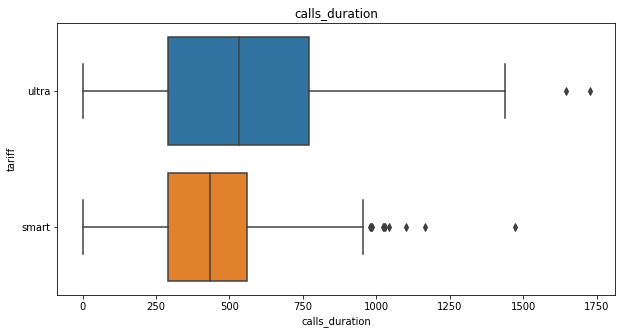

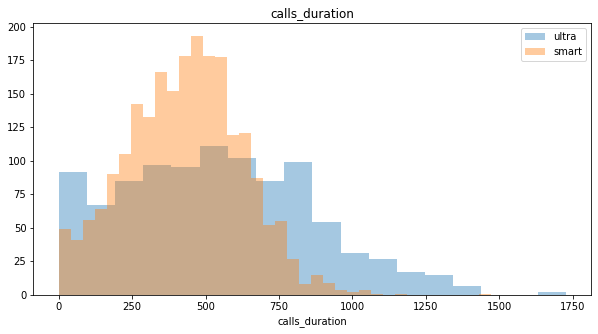

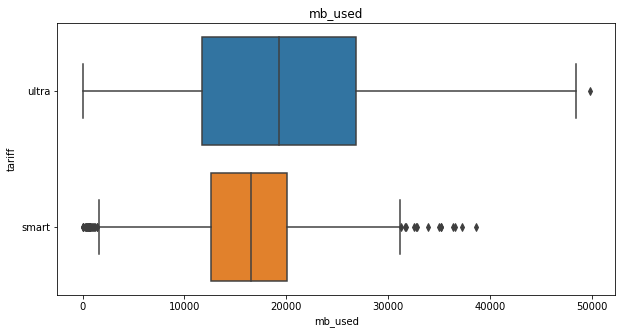

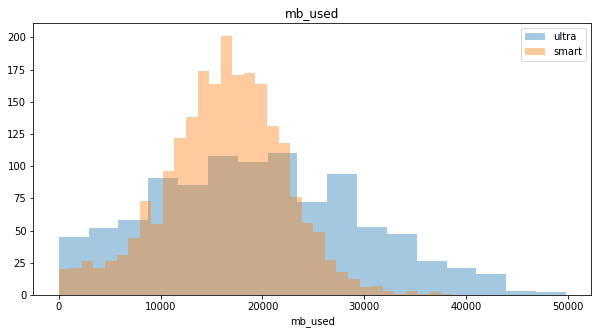

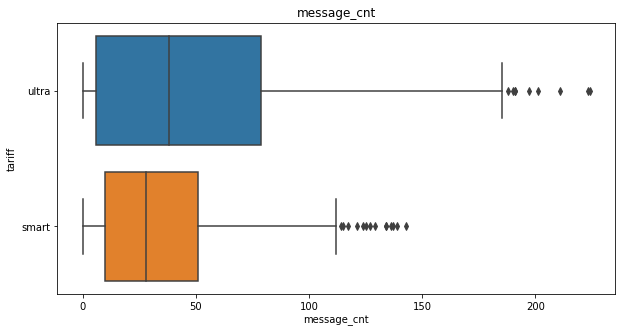

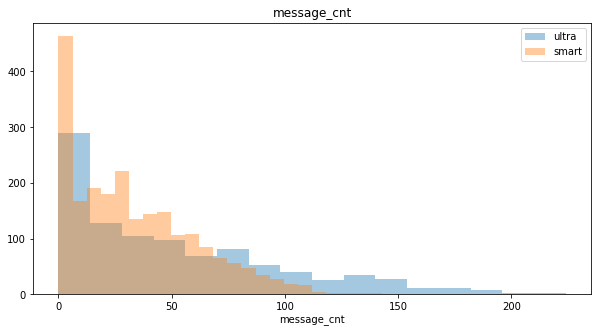

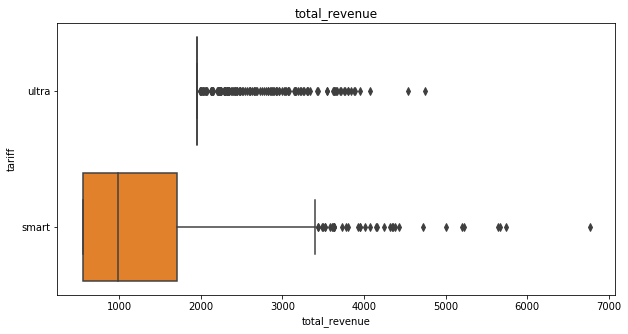

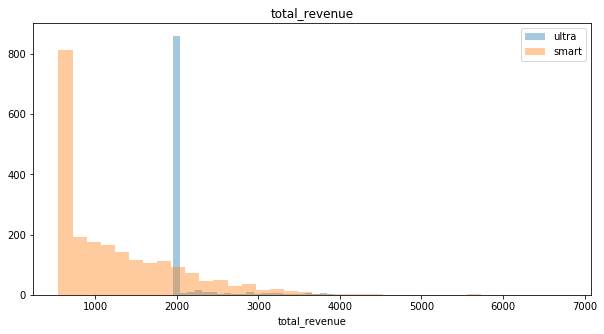

In [73]:
# < Формируем цикл для построеня гистограмм, расчёта среднего, дисперсии и стандартного отклонения
# длительности разговора, объема интернет-трафика, смс и суммарной выручки >

df_smart = df_summary.query('tariff == "smart"')
df_ultra = df_summary.query('tariff == "ultra"')

for column in df_summary.loc[:, ['calls_duration', 'mb_used', 'message_cnt', 'total_revenue']]:
    
    sns.boxplot(x=column, y='tariff', data=df_summary, orient="h").set_title(column)
    plt.show()

    ax = sns.distplot(df_summary.query('tariff == "ultra"')[column], label='ultra', kde=False)
    plt.legend()
    sns.distplot(df_summary.query('tariff == "smart"')[column], label='smart', ax=ax, kde=False).set_title(column)
    plt.legend()
    plt.show()

In [74]:
# < Судя по документации, функции 'var' и 'std' при группировке идут с дефолтным 'ddof=1' 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.var.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.std.html >

df_summary_stats = df_summary.pivot_table(index='tariff', 
                       values=('calls_duration', 'mb_used', 'message_cnt', 'total_revenue'), 
                       aggfunc=('mean', 'var', 'std'))
df_summary_stats

calls_duration                                  mb_used                \
                 mean         std            var          mean           std   
tariff                                                                         
smart      429.258296  195.039589   38040.441104  16229.903139   5888.523413   
ultra      540.231237  326.028527  106294.600282  19468.938134  10111.047371   

                     message_cnt                         total_revenue  \
                 var        mean        std          var          mean   
tariff                                                                   
smart   3.467471e+07   33.369058  28.230396   796.955256   1250.801345   
ultra   1.022333e+08   49.313387  47.806040  2285.417425   2060.409736   

                                   
               std            var  
tariff                             
smart   797.514660  636029.632569  
ultra   356.124706  126824.806565

### 1. Длительность звонков:

Медиана и среднее значение двух тарифов близки, при этом данные по тарифу Ультра имеют сильно большую дисперсию и стандартное отклонение. Данные по тарифу "Смарт", судя по гистограмме, распределены "нормально", с пиком на значении 430. По правилам 3х сигм 99% значений находятся между 0 и 1000. Это же отражает boxplot. Данные по тарифу "Ультра" имеют больший разброс. Гистограмма имеет 3 пика, стандартное отклонение от среднего равно 326, то есть 99% значение лежит между 0 и 1518.

Важно отметить, что среднее в тарифе "Смарт" близко к лимиту минут разговора в этом тарифе. То есть большАя часть клиентов не укладывается в предусмотренные тарифом минуты разговора и вынуждена переплачивать. При этом все клиенты "Ультра" укладываются в 3000 минут, предусмотренные в этом тарифе.

### 2. Интернет трафик:

Распределение данных по интернет трафику схоже с данными по звонкам. При близких средних в тарифе "Ультра" разброс сильно больше. 99% значений по тарифу "Смарт" лежит между 0 и 33977, в тарифе "Ультра" - от 0 до 49892. Стандартное отклонение в тарифе "Ультра" в два раза превышает std в тарифе "Смарт".

И среднее и медиана по тарифу "Смарт" превышает лимит по тарифу. Это значит, что больше половины пользователей этого тарифа не укладываются в отведённый лимит и платят за дополнительный трафик. Для тарифа "Ультра" этот процент ниже. Лимит 30гб лежит на расстоянии среднее + 1 сигма, то есть 84% пользователей укладывается в лимит по тарифу

### 3. СМС:

Судя по диаграмме boxplot, смс - не самое популярное средство связи: ящики смещены к нулю. Оба распределения имеют вид распределения Пуассона. При этом сохраняется та же тенденция: данные по тарифу "Ультра" имеют больший разброс. Но все клиенты этого тарифа укладываютсяв лимит 1000 сообщений, в то время как большАя часть клиентов тарифа "Смарт" превышают лимит по смс.

### 4. Помесячная выручка:

Интересно, что в данных по суммарной месячной выручке наблюдается обратная тенденция: данные по тарифу "Смарт" разбросаны сильнее. Стандартное отклонение в этом тарифе - 801, что превышает даже ежемесячный платёж. Важно отметить, что среднее значение по тарифу "Смарт" равно 1257, медиана находится в районе 1000. Оба значения в 2 раза превышают ежемесячную плату (!). При этом выручка по тарифу "Ультра" в большинстве случаев равна ежемесячной плате с небольшим количеством выбросов.

### Шаг 4. Проверка гипотез.
<a id='4'></a>

### Гипотеза 1:

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» РАВНА.

Альтернативная гипотеза: средняя выручка пользователей тарифа "Ультра" БОЛЬШЕ средней выручке в тарифе "Смарт".

Нам важно не просто узнать, равны ли среднии выручки двух тарифов, но и понять, какой из них выгоднее. Поэтому лучше сформулировать одностороннюю гипотезу. Поскольку данные о клиентах разных тарифов представляют собой две разные генеральные совокупности, воспользуемся методом проверки гипотезы о равенстве средних двух генеральных совокупностей. 

In [75]:
results = st.ttest_ind(
    df_ultra['total_revenue'], 
    df_smart['total_revenue'])

print('p-значение: ', results.pvalue / 2)
if (results.pvalue  / 2 < 0.05) and (df_ultra['total_revenue'].mean() > df_smart['total_revenue'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  1.5135383429136641e-180
Отвергаем нулевую гипотезу


### Вывод:

Равенство средних месячной выручки пользователей двух тарифов маловероятно. При этом велика вероятность того, что средняя выручка по тарифу "Ультра" выше, чем по тарифу "Смарт".

### Гипотеза 2:

Нулевая гипотеза: средняя выручка пользователей из Москвы РАВНА выручке пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы НЕ равна средней выручке пользователей из других регионов.

Данные также представляют собой 2 генеральные совокупности, среднее которых необходимо сравнить. Воспользуемся тем же методом.

In [76]:
df_moscow = df_summary.query('city == "Москва"')
df_region = df_summary.query('city != "Москва"')

results = st.ttest_ind(
    df_moscow['total_revenue'], 
    df_region['total_revenue'])

print('p-значение: ', np.round(results.pvalue, decimals=4))
if (results.pvalue < 0.05) and (data.mean() > popmean):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5182
Не получилось отвергнуть нулевую гипотезу


### Вывод:

Разница в выручке между пользователями из Москвы и пользователями из регионов маловероятна или не значима.

### Шаг 5. Общий вывод
<a id='5'></a>

**В ходе проделанной работы было выдвинуто 2 гипотезы:**

1. Средняя месячная выручка пользователей тарифов "Смарт" и "Ультра" не отличается.
Эту гипотезу можно отвергнуть, так как вероятность, что разница между тарифами случайно крайне мала. С большой долей вероятности можно утверждать, что средняя месячная выручка пользователей у тарифа "Ультра" больше, чем у тарифа "Смарт".

2. Средняя месячная выручка пользователей из Москвы равна выручке пользователей из других городов.
Эту гипотезу отвергнуть не получилось. Отличие в выручке между Москвой и другими городами маловероятно.

3. Так же важно отметить, что большАя часть пользователей тарифа "Смарт" не укладывается в месячный лимит по минутам разговора и интернет трафика.

4. Несмотря на то, что у пользователи тарифа "Ультра" почти всегда укладываются в лимит по тарифу, вариативность данных у них выше.

**На основе исследований можно дать следующие рекомендации:**

1. При рекламе и продаже тарифов бОльшее внимание стоит уделить тарифу "Ультра", так как он приносит больше выручки на 1 клиента.
2. Не стоит делать отдельный тариф для Москвы и регионов, так как маловероятно, что это влияет на выручку.
3. Пересмотреть лимиты по тарифу "Смарт". БольшАя часть пользователей перерасходует лимит и вынужден переплачивать. Это может вызвать негатив и спровоцировать уход клиента. Возможно, стоит чуть повысить стоимость и расширить лимит.
4. В тарифе "Ультра" большая вариативность данных. Часть пользователей приближается к лимиту в месяц, а часть из них не расходует даже половины лимита. Возможно, стоит предусмотреть промежуточный тариф. Это поможет решить и проблему из пункта 3.
